## PROJET RAKUTEN

# Récupération des données

---



## Chargement des données et librairies

In [ ]:
#Chargement des librairies

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os

In [ ]:
# montage du lecteur drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Projet DataScientest Rakuten')
#os.chdir('/content/drive/Sharedrives/Projet DataScientest Rakuten')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/.shortcut-targets-by-id/1ycP0Bk48HXaxmCdx5ENk3Q1qnAaAgFuS/Projet DataScientest Rakuten'

In [ ]:
#Récupération des features
X_train=pd.read_csv('Data_sources/X_train.csv',index_col=0)
X_test=pd.read_csv('Data_sources/X_test.csv',index_col=0)

print('---Features---')
display(X_train.head())

# Récupération des targets.
y_train=pd.read_csv('Data_sources/Y_train.csv',index_col=0)


# Récupération des classes produit
Product_catalog=pd.read_csv('Data_sources/classes produits.csv', index_col=0)

dict_code_to_id = {}
dict_id_to_code={}

list_tags = list(y_train['prdtypecode'].unique())

for i,tag in enumerate(list_tags):
    dict_code_to_id[tag] = i 
    dict_id_to_code[i]=tag
    
y_train['label'] = y_train['prdtypecode'].map(dict_code_to_id)

print('---Labels---')
display(y_train.head())

cl_prod = Product_catalog.drop('prdtypegroup', axis=1)
Y_train = y_train.join(cl_prod,on='prdtypecode')

print('---Labels avec désignations classes---')
display(Y_train.head(10))

---Features---


,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


---Labels---


,prdtypecode,label
0,10,0
1,2280,1
2,50,2
3,1280,3
4,2705,4


---Labels avec désignations classes---


,prdtypecode,label,prdtypecategory
0,10,0,Livres 1
1,2280,1,Archives journaux et presse
2,50,2,Accessoire de jeu vidéo
3,1280,3,Jouets
4,2705,4,Livres 2
5,2280,1,Archives journaux et presse
6,10,0,Livres 1
7,2522,5,Papeterie
8,1280,3,Jouets
9,2582,6,Décoration extérieure et accessoires


In [ ]:

# X_train[X_train['designation']=='5d Broderie Peintures Strass Diamant Bricolage Pasted Peinture Point De Croix']
#Product_catalog

##Helper

In [ ]:
#fonction pour accéder facilement aux répertoire image
def get_img_path(img_id,product_id,train=True):
    source_path='Data_sources/images/'
    subfold='image_train/'
    if not train: subfold='image_test/'        
    ext='.jpg'
    img_code='image_{0}_product_{1}'.format(img_id,product_id)
    return source_path+subfold+img_code+ext

In [ ]:
# DEFINITION DES PARAMETRES D'ENTRAINEMENT
def get_model_params():
  '''
  Initialisation des parametres du modele avec valeurs de base
  '''
  # ResNet50, VGG16, MobileNetV2
  IMAGE_ALGO = 'ResNet50'
  # (128,128), (256,256)
  TARGET_SIZE = (256,256)
  # 32, 64
  BATCH_SIZE = 64
  # 0.01, 0.001
  LEARNING_RATE = 0.01
  INPUT_SHAPE=(256,256,3)
  print("_____MODELE_______")
  print("Name:\t\t", IMAGE_ALGO)
  print("BATCH_SIZE:\t",BATCH_SIZE)
  print("LEARNING_RATE:\t",LEARNING_RATE)

  return  IMAGE_ALGO,TARGET_SIZE,BATCH_SIZE,LEARNING_RATE,INPUT_SHAPE

In [ ]:
def get_model_name(IMAGE_ALGO='ResNet50',BATCH_SIZE=64, LEARNING_RATE=0.01):
  MODEL_BASE = 'Modeles/' + str(BATCH_SIZE) + '_' + str(LEARNING_RATE) + '_'
  MODEL_JSON = MODEL_BASE + 'classifierTranferLearning'+ IMAGE_ALGO + '.json'
  MODEL_H5 = MODEL_BASE + 'classifierTranferLearning'+ IMAGE_ALGO + '.h5'
  return MODEL_JSON, MODEL_H5

In [ ]:
def get_conf_mat_path(IMAGE_ALGO='ResNet50',BATCH_SIZE=64, LEARNING_RATE=0.01):
 return 'Output/Confusion_Matrix_' + IMAGE_ALGO +'_' + str(BATCH_SIZE) + '_' + str(LEARNING_RATE) + '.png'
print(get_conf_mat_path())

Output/Confusion_Matrix_ResNet50_64_0.01.png


# Analyses préliminaires

## Analyse descriptive

In [ ]:
recheck_img_set=False  # Set as true to recheck full img set (long)

print("Taille de l'échantillon d'entrainement: {0} lignes".format(X_train.shape[0]))
print("Soit un total de {0} données.".format(X_train.size))

if recheck_img_set:
  print("Nombre d'images du dataset Train:",len(os.listdir('Data_sources/images/image_train')))
else:
  print("Nombre d'images du dataset Train:",84916)

print("\nTaille de l'échantillon de test: {0} lignes".format(X_test.shape[0]))
print("Soit un total de {0} données.".format(X_test.size))

if recheck_img_set:
  print("Nombre d'images du dataset Train:",len(os.listdir('Data_sources/images/image_train')))
else:
  print("Nombre d'images du dataset Train:",13812)

print ("% d'articles sans description:",X_train['description'].isna().sum()/X_train.shape[0]*100)

Taille de l'échantillon d'entrainement: 84916 lignes
Soit un total de 339664 données.
Nombre d'images du dataset Train: 84916

Taille de l'échantillon de test: 13812 lignes
Soit un total de 55248 données.
Nombre d'images du dataset Train: 13812
% d'articles sans description: 35.09350416882566


On remarque que la quantité d'images correspond bien aux tailles des data sets.
Nous pouvons donc présumer que le data set est complet

In [ ]:
#Check that no columns except description get nas

print('--------data_set without description ')
print('Xtrain: {0} values'.format(X_train['description'].isna().sum()))
print('Xtest : {0} values'.format(X_test['description'].isna().sum()))

print('\n--------data_set with data missing (other than description)')
print('Xtrain: {0} values'.format(X_train.drop(columns=['description']).isna().any(axis=1).sum()))
print('Xtest : {0} values'.format(X_test.drop(columns=['description']).isna().any(axis=1).sum()))

--------data_set without description 
Xtrain: 29800 values
Xtest : 4886 values

--------data_set with data missing (other than description)
Xtrain: 0 values
Xtest : 0 values


Les data sets sont propres et ne présentent aucun NA. (autre que description)
il y'a 29800 descriptions manquantes dans le data set d'entrainement et 4886 sur les données de test


**Analyse des labels**

Nombre de classes "prdtypecode": prdtypecode    27
label          27
dtype: int64
Affichage des classes par répartition


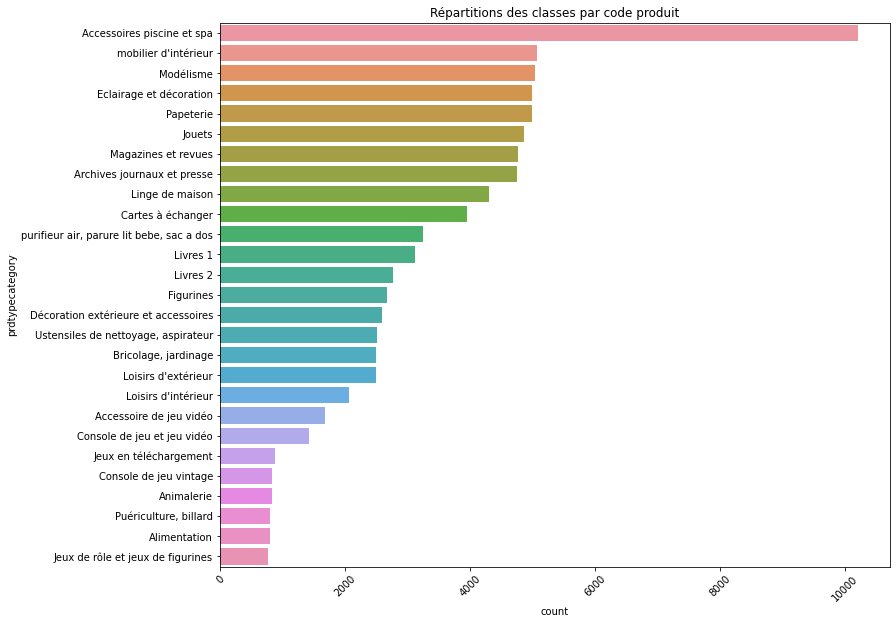

In [ ]:
print('Nombre de classes "prdtypecode":', y_train.nunique())
print('Affichage des classes par répartition')

plt.figure(figsize = (12,10))
sns.countplot(y=Y_train['prdtypecategory'], order= Y_train['prdtypecategory'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Répartitions des classes par code produit');
plt.savefig('Output/Classes_par_code_produit.png')

##Analyse des dossiers images##

In [ ]:
# récupération de 3 images du training set (au hasard) 
indexes=np.random.randint(0,X_test.shape[0],3)

indexes=np.random.randint(0,X_train.shape[0],3)
#==> permet de récupérer plusieurs paths
#img_list=list(X_train.iloc[indexes].apply(lambda x: get_img_path(x['imageid'],x['productid']),axis=1))
#indexes=X_train[X_train['designation']=='5d Broderie Peintures Strass Diamant Bricolage Pasted Peinture Point De Croix'].index
indexes

array([81565, 67914,  2602])

In [ ]:
for index in indexes:
    #iloc[0]==> pour faire 'sauter l'index initial et ne récupérer que le résultat'
    im_path=X_train.iloc[[index]].apply(lambda x: get_img_path(x['imageid'],x['productid']),axis=1).iloc[0]
    plt.imshow(imread(im_path))
    plt.axis('off');
    print('Produit:',X_train.iloc[index]['designation'])
    print('Description :',X_train.iloc[index]['description'])
    print('Image :')
    plt.show()


OSError: ignored

In [ ]:
df = pd.concat([X_train,Y_train], axis=1)
df.head()

,designation,description,productid,imageid,prdtypecode,label,prdtypecategory
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10,0,Livres 1
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280,1,Archives journaux et presse
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50,2,Accessoire de jeu vidéo
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280,3,Jouets
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705,4,Livres 2


In [ ]:
for typecode in df.prdtypecode.unique():
  list_indexes = df[df['prdtypecode']==typecode].index
  indexes = np.random.choice(list_indexes, 2)
  print('\n', df['prdtypecategory'][indexes[0]])
  
  for index in indexes:
      im_path=df.iloc[[index]].apply(lambda x: get_img_path(x['imageid'],x['productid']),axis=1).iloc[0]
      plt.imshow(imread(im_path))
      plt.axis('off')
      #print('Produit:',df.iloc[index]['designation'])
      #print('Description :',df.iloc[index]['description'])
      #print('Image :')
      plt.show();


 Livres 1


OSError: ignored

In [ ]:
# df = pd.concat([X_train.text2,y_train], axis=1)
# df.head()

# df_cat1= df[df.label ==2]

# txt = ""
# for ch in df_cat1['text']:
#   txt+= ' ' + ch
# word_cloud_cat(txt)
#FAIRE UNE FONCTION

# Analyse lexicale

**convertir les chaines html en chaines normales (unicode)**


In [ ]:
import re
from html.entities  import codepoint2name, name2codepoint
from wordcloud import WordCloud

def html2txt(html):
    """convertit la chaine html en chaine normale (unicode)
    """
    # Commencer paar remplacer les espaces
    html = re.sub("&nbsp;", u" ", html)

    motif = '&(%s);' % ('|'.join(name2codepoint))
    rempl = lambda m: chr(name2codepoint[m.group(1)])
    return re.sub(motif, rempl, html)

# Supprimer les balises html
def cleanhtml(html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', html)
  return ''.join(cleantext)

def word_cloud_cat(liste_mots_cat):
  wc = WordCloud(background_color ='black', max_words = 100, stopwords= stop_words, max_font_size= 50, random_state=42)
  plt.figure(figsize= (12,8))

  wc.generate(''.join(liste_mots_cat)) 
  plt.imshow(wc) 
  
  plt.show()

In [ ]:
X_train['description_ok'] = X_train['description'].fillna('')
X_train['text_tag'] = X_train.apply(lambda row: row['designation'] + row['description_ok'], axis=1)
X_train['text'] = X_train['text_tag'].apply(html2txt).apply(cleanhtml)

In [ ]:
X_train['text']

0        Olivia: Personalisiertes Notizbuch / 150 Seite...
1        Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2        Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3        Peluche Donald - Europe - Disneyland 2000 (Mar...
4        La Guerre Des TuquesLuc a des idées de grandeu...
                               ...                        
84911                          The Sims [ Import Anglais ]
84912    Kit piscine acier NEVADA déco pierre Ø 3.50m x...
84913    Journal Officiel De La Republique Francaise N°...
84914    Table Basse Bois De Récupération Massif Base B...
84915    Gomme De Collection 2 Gommes Pinguin Glace Ver...
Name: text, Length: 84916, dtype: object

**Affichage de WordCloud pour chaque categorie**

In [ ]:
pip install swifter # (Besoin qu'une seule fois)

     |████████████████████████████████| 280 kB 5.3 MB/s 
     |████████████████████████████████| 132 kB 47.7 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import swifter

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = stopwords.words(['french', 'english'])

In [ ]:
print(stop_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [ ]:
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())

    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)

    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!]+", " ", w)
    w = re.sub(r'\b\w{0,2}\b', '', w)

    # remove stopword
    mots = word_tokenize(w.strip())
    mots = [mot for mot in mots if mot not in stop_words]

    return ' '.join(mots).strip()

In [ ]:
X_train['text2'] = X_train.text.swifter.apply(lambda x :preprocess_sentence(x))
# sinon ca fait un min bug

Pandas Apply:   0%|          | 0/84916 [00:00<?, ?it/s]

In [ ]:
# X_train['abc'] = X_train.text.swifter.apply(lambda x :preprocess_sentence(x))

In [ ]:
# index=2
# print('___________designation___________\n',X_train.iloc[index]['designation'])
# print('___________description___________\n',X_train.iloc[index]['description'])
# print('___________description_ok________\n',X_train.iloc[index]['description_ok'])
# print('___________text_tag______________\n',X_train.iloc[index]['text_tag'])
# print('___________text__________________\n',X_train.iloc[index]['text'])
# print('___________abc___________________\n',X_train.iloc[index]['abc'])

# Entrainement de Modeles en Transfer Learning

## Librairies et préprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import tensorflow as tf

from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Flatten, Activation
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import Adam


from tensorflow.keras import callbacks

from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

import seaborn as sns

In [ ]:
## Ajout du path et intégration des targets pour utilisation via flowfromDF
X_train['path'] = X_train.apply(lambda row: get_img_path(row['imageid'], row['productid']), axis = 1)

X_train['label'] = y_train['label']
X_train['label'] =X_train['label'].astype('string')

In [ ]:
## Séparation des données en TRAIN/VAL/TEST
# SPLIT TRAIN & TEST SETS
data_train_feats, data_test = train_test_split(
    X_train,                        
    test_size = 0.1,                        # size of validation observations
    shuffle = True,                         # shuffle observations (explicitly)
    stratify = X_train['label'],            # preserve distribution of labels
    random_state = 123              
)
# SPLIT TRAIN & TEST SETS
data_train, data_val = train_test_split(
    data_train_feats,                       
    test_size = 0.2,                        # size of validation observations
    shuffle = True,                         # shuffle observations (explicitly)
    stratify = data_train_feats['label'],   # preserve distribution of labels
    random_state = 1235                     
)

## Entrainement

### Définition des générateurs d'image


In [ ]:
# Getting model parameters
IMAGE_ALGO,TARGET_SIZE,BATCH_SIZE,LEARNING_RATE,INPUT_SHAPE = get_model_params()

_____MODELE_______
Name:		 ResNet50
BATCH_SIZE:	 64
LEARNING_RATE:	 0.01


In [ ]:
# TRAINING GENERATOR
# Configure ImageDataGenerator
img_gen_train = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    # data augmentation
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 1.1,
    horizontal_flip = True
)
# Generate DataFrameIterator
data_flow_train = img_gen_train.flow_from_dataframe(
    dataframe = data_train,	   # use training observations
    target_size = TARGET_SIZE, 
    shuffle = True,            # shuffle observations (explicitly)
    seed = 1222,               
    x_col = 'path',     	     # column containing path to image
    y_col = 'label',           # column containing label
    class_mode = 'sparse',     
    batch_size = BATCH_SIZE    
)

# VALIDATION GENERATOR
# Configure ImageDataGenerator
img_gen_val = ImageDataGenerator(
    preprocessing_function = preprocess_input	# /!\ must match model /!\
)
# Generate DataFrameIterator
data_flow_val = img_gen_val.flow_from_dataframe(
    dataframe = data_val,       # use validation observations
    target_size = TARGET_SIZE,  
    shuffle = False,		        # /!\ shuffling this changes labels encoding /!\
    x_col = 'path',     	      # column containing path to image
    y_col = 'label',            # column containing label
    class_mode = 'sparse',      
    batch_size = BATCH_SIZE     
)

Found 61139 validated image filenames belonging to 27 classes.
Found 15285 validated image filenames belonging to 27 classes.


### Définition du modèle

In [ ]:
################################################################################
# CHOIX DU MODELE DE BASE
################################################################################

# Getting model parameters
IMAGE_ALGO,TARGET_SIZE,BATCH_SIZE,LEARNING_RATE,INPUT_SHAPE=get_model_params()

# Getting saving paths
MODEL_JSON,  MODEL_H5= get_model_name(IMAGE_ALGO, BATCH_SIZE, LEARNING_RATE)

# Getting base model shape
if IMAGE_ALGO == 'ResNet50':
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)
if IMAGE_ALGO == 'VGG16':
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)
if IMAGE_ALGO == 'MobileNetV2':
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

# Bloquage du blackbone
for layer in base_model.layers:
    layer.trainable = False
# base_model.summary()

_____MODELE_______
Name:		 ResNet50
BATCH_SIZE:	 64
LEARNING_RATE:	 0.01
94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# CONSTRUCTION DU CNN DE CLASSIFICATION
model = Sequential()

model = Sequential([
    
    base_model,
    
    GlobalAveragePooling2D(),

    Dense(1024),
    BatchNormalization(),
    Activation('relu'),
    
    Dropout(0.2),
    
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    
    Dropout(0.2),
    
    Dense(27),
    Activation('softmax')
])

model.summary()

In [ ]:
#Compilation du modele
model.compile(
    optimizer = Adam(LEARNING_RATE),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

# # Savegarde automatique des poids
# checkpoint = callbacks.ModelCheckpoint(filepath='Output/checkpointResNet50', 
#                                        monitor='val_loss',
#                                        save_best_only=True,
#                                        save_weights_only=False,
#                                        mode='min',
#                                        save_freq='epoch')

# Réduction automatique du taux d'apprentissage
lr_plateau = callbacks.ReduceLROnPlateau(monitor='val_loss',
                                         patience=3,
                                         factor=0.01,
                                         min_lr=1e-9,  # expectedly never reached
                                         verbose=1,
                                         mode='min')

cb_stopping = callbacks.EarlyStopping( monitor = 'val_loss',         # most reliable criterion
                                        mode = 'min',
                                        patience = 3,                 # stagnation tolerance
                                        restore_best_weights = True,
                                        verbose = 1)

### Entrainement du modèle

In [ ]:
history = model.fit(
            x = data_flow_train,              # training generator
            epochs = 10,
            validation_data = data_flow_val,  # validation generator
            batch_size = None,                
            callbacks = [lr_plateau, cb_stopping]
        )

### Sauvegarde du modèle

In [ ]:
# Save model
model_json = model.to_json()

with open(MODEL_JSON, "w") as json_file:
    json_file.write(model_json)

model.save_weights(MODEL_H5, save_format='h5')

## Evaluation des performances

In [ ]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

In [ ]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss per epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model accuracy per epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.show()

In [ ]:
# TEST GENERATOR
# Configure ImageDataGenerator
img_gen_test = ImageDataGenerator(
    preprocessing_function = preprocess_input
)
# Generate DataFrameIterator
data_flow_test = img_gen_test.flow_from_dataframe(
    dataframe = data_test,       
    target_size = TARGET_SIZE,   
    shuffle = False,		        
    x_col = 'path',     	       # column containing path to image
    y_col = 'label',             # column containing label
    class_mode = 'sparse',       # classes are not one-hot encoded
    batch_size = BATCH_SIZE      
)

Found 8492 validated image filenames belonging to 27 classes.


In [ ]:
# Generation des predictions et affichage de la matrice de confusion

y_prob = model.predict(
    x = data_flow_test,   
    batch_size = None,    
    steps = None,         
    verbose = 1
)

classidx_pred = np.argmax(y_prob, axis=1)
classidx_true = np.array(data_flow_test.classes)

print('Accuracy :', accuracy_score(classidx_true, classidx_pred))

#y_pred = np.argmax(y_prob, axis=1)
#y_pred = tf.argmax(y_prob, axis=-1).numpy()

print('Confusion Matrix')
confusion_matrix_ = confusion_matrix(classidx_true, classidx_pred)
print(confusion_matrix_)

plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix_, annot=True)

savefig(get_conf_mat_path(IMAGE_ALGO,BATCH_SIZE, LEARNING_RATE))


In [ ]:
y_prob_img=y_prob
....

y_prob_txt=y_prob


y_prob=(y_prob_img+y_prob_txt)/2

In [ ]:
def predict_image(index):
  data_test_df = data_test.loc[[index]]
  # Configure ImageDataGenerator
  img_gen_test = ImageDataGenerator(
      preprocessing_function = preprocess_input	# /!\ must match model /!\
  )

  data_flow_test_one = img_gen_test.flow_from_dataframe(
      dataframe = data_test_df,      
      target_size = TARGET_SIZE,     
      shuffle = False,		           
      x_col = 'path',     	         # column containing path to image
      y_col = 'label',               # column containing label
      class_mode = 'sparse',         # classes are not one-hot encoded
      batch_size = BATCH_SIZE        
  )

  reconstructed_y_prob_one = reconstructed_model_image.predict(
      x = data_flow_test_one,    
      batch_size = None,         # specified by generator
      steps = None,              # specified by generator
      verbose = 1
  )

  # ATTENTION, tour de passe-passe pour s'en tirer
  # ATTENTION: Besoin de créer le tmp_dict et d'exécuter le data_flow_test pour récupérer l'intégralité des classes
  #____________________________________________________________________________
  predicted_class = np.argmax(reconstructed_y_prob_one, axis=1)[0]
  for key, val in tmp_dict.items():
    if predicted_class == val:
      final_predicted = key

  #____________________________________________________________________________

  real_class = int(data_test_df['label'].values[0])

  print("Classe réelle: ", real_class, '\t',Product_catalog[Product_catalog.prdtypecode==dict_id_to_code[real_class]]['prdtypecategory'].values[0])
  print("Classe prédite: ", final_predicted, '\t', Product_catalog[Product_catalog.prdtypecode==dict_id_to_code[int(final_predicted)]]['prdtypecategory'].values[0])

  im_path=data_test_df['path'].values[0]
  plt.imshow(imread(im_path))
  plt.axis('off');

  plt.show()

## Chargement du modèle

In [ ]:
##############################################
# Load model

################################################################################
# CHOIX DU MODELE DE BASE
################################################################################
# ResNet50, VGG16, MobileNetV2

# Getting model parameters
IMAGE_ALGO,TARGET_SIZE,BATCH_SIZE,LEARNING_RATE,INPUT_SHAPE=get_model_params()

# MAJ Manuelle des parametres
LEARNING_RATE = 0.001
IMAGE_ALGO = 'ResNet50'
# IMAGE_ALGO = 'VGG16'
# IMAGE_ALGO = 'MobileNetV2'

# Getting paths
MODEL_JSON,  MODEL_H5= get_model_name(IMAGE_ALGO, BATCH_SIZE, LEARNING_RATE)

from tensorflow import keras
from keras.models import model_from_json

with open(MODEL_JSON, 'r') as fx:
    model_json_string = fx.read()

reconstructed_model_image = model_from_json(model_json_string)
reconstructed_model_image.load_weights(MODEL_H5)
## Ce qui permet de réutilser la partie évaluation des performances
model=reconstructed_model_image

_____MODELE_______
Name:		 ResNet50
BATCH_SIZE:	 64
LEARNING_RATE:	 0.01


## Prédiction sur une image

In [ ]:
#ATTENTION, IL FAUT EXECUTER LA COMMANDE TEST_GENERATOR EN AMONT DE CETTE CELLULE!!!!
##TEMPORAIRE:!!!!!!

# Create tmp_dict
tmp_dict=data_flow_test.class_indices
# tmp_dict

In [ ]:
# index=np.random.choice(data_test[data_test['label']=='16'].index)
#SI ON VEUT FORCER SUR UNE CLASSE
for i in range(10):
  index=np.random.choice(data_test.index)
  predict_image(index)

Found 1 validated image filenames belonging to 1 classes.
1/1 [==============================] - 9s 9s/step


AttributeError: ignored

# Entrainement RNN - Word Embeding

## Processing

In [ ]:
#Récupérer les infos depuis le dataset pré_traité!!!

In [ ]:
X_train.text = X_train.text.swifter.apply(lambda x :preprocess_sentence(x))
X_train.text.head(10)
X_val.text = X_val.text.swifter.apply(lambda x :preprocess_sentence(x))
X_val.text.head(10)




In [ ]:
import tensorflow as tf

# Définition du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)

# Mettre à jour le dictionnaire du tokenizer
tokenizer.fit_on_texts(X_train.text)

In [ ]:
# Définition des dictionnaires
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words

In [ ]:
vocab_size

In [ ]:
# on transforme les textes en séquence d'entiers
X_train.sequences = tokenizer.texts_to_sequences(X_train.text)
X_val.sequences = tokenizer.texts_to_sequences(X_val.text)

In [ ]:
#list = [liste1, .... listeN]
#np.mean(X_train.sequences.apply(lambda x: len(x)))
#sequences = X_train.sequences.apply(lambda x: len(x)).mean(axis=0)

sequences = [len(x) for x in X_train.sequences]
moy_sequences = np.mean(sequences)

In [ ]:
# Resultat => Tableau numpy de 500 colonnes
# A voir avec la taille des sequences!!!
maxlen = moy_sequences #500

X_train.sequences = tf.keras.preprocessing.sequence.pad_sequences(X_train.sequences, maxlen=maxlen, padding='post')
X_val.sequences = tf.keras.preprocessing.sequence.pad_sequences(X_val.sequences, maxlen=maxlen, padding='post')

## Définition du modèle

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, RNN, GRUCell, LSTMCell, Dropout

#embedding_dim = 200
embedding_dim = 300

model_text = Sequential()

model_text.add(Embedding(10000, embedding_dim))

model.add(RNN(LSTMCell(256), return_sequences=True))
#model_text.add(RNN(GRUCell(256), return_sequences=True))

model_text.add(Dropout(0.3))

model_text.add(GlobalAveragePooling1D())

model_text.add(Dense(128, activation='relu'))
model_text.add(Dropout(0.3))

model_text.add(Dense(27, activation='softmax'))

model_text.summary()

In [ ]:
model_text.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_text = model_text.fit(X_train.sequences, y_train.values,
                    batch_size = 64,
                    epochs=10,
                    validation_data = [X_val.sequences, y_val.values])

In [ ]:
#model.evaluate(X_test, y_val.values, batch_size=128, return_dict=True)
X_test.sequences = tokenizer.texts_to_sequences(X_test.text)
X_test.sequences = tf.keras.preprocessing.sequence.pad_sequences(X_test.sequences, maxlen=48, padding='post')

## Evaluation

In [ ]:
model_text.evaluate(X_test.sequences, y_test.values, batch_size=64, return_dict=True)

In [ ]:
y_predicted_text = model_text.predict(X_test.sequences)

In [ ]:
text_predicted_class_indices = np.argmax(y_predicted_text, axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(confusion_matrix(y_test.values, text_predicted_class_indices))

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test.values, text_predicted_class_indices))

In [ ]:
# Save model
model_text.save('Output/textClassifierRNNBow.h5', save_format='h5')

In [ ]:
#######

In [ ]:
# Load model
from tensorflow import keras

reconstructed_text_model = keras.models.load_model("Output/textClassifierRNNBow.h5")

In [ ]:
reconstructed_text_model.evaluate(X_test.sequences, y_test.values, batch_size=128, return_dict=True)